In [1]:
import numpy as np
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms

In [10]:
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [12]:
learning_rate=[0.04,0.085,0.09,0.095,0.1,0.15,0.2,0.25,0.3,0.4]
acc=[]
for t in learning_rate:
  class MNIST_Multilayer_P(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784,5)
        self.lin2=nn.Linear(5,10)
    def forward(self, x):
        x=self.lin1(x)
        x=F.relu(x)
        return(self.lin2(x))
  model=MNIST_Multilayer_P()#calling the multilayer_p model 
  croos_entropy=nn.CrossEntropyLoss()#cross_entropy loss
  optimizer = torch.optim.SGD(model.parameters(), lr=t)#optimizer
  for e in range(4):
    for images, labels in train_loader:
        x = images.view(-1, 28*28)
        optimizer.zero_grad()
        y=model(x)
        loss=croos_entropy(y,labels)
        loss.backward()
        optimizer.step()
  correct = 0
  total = len(mnist_test)
  with torch.no_grad():
    for images, labels in test_loader:
        x = images.view(-1, 28*28)
        y=model(x)
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
  acc.append(correct/total)
  print("For",t,"learning rate accuracy =",correct/total)

For 0.04 learning rate accuracy = tensor(0.8649)
For 0.085 learning rate accuracy = tensor(0.8798)
For 0.09 learning rate accuracy = tensor(0.8892)
For 0.095 learning rate accuracy = tensor(0.8838)
For 0.1 learning rate accuracy = tensor(0.8889)
For 0.15 learning rate accuracy = tensor(0.8911)
For 0.2 learning rate accuracy = tensor(0.8978)
For 0.25 learning rate accuracy = tensor(0.8834)
For 0.3 learning rate accuracy = tensor(0.8198)
For 0.4 learning rate accuracy = tensor(0.7421)


In [13]:
learning_rate=np.array(learning_rate)
acc=np.array(acc)

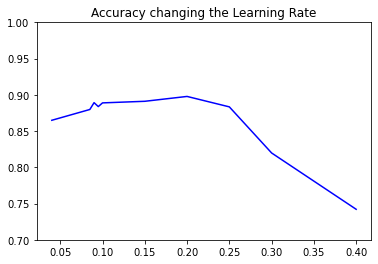

In [16]:
from matplotlib import pyplot
pyplot.plot(learning_rate,acc,color='b')
pyplot.ylim(0.7,1)
pyplot.title("Accuracy changing the Learning Rate")
pyplot.show()